In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import csv

file_path = '/content/NEET RESULTS 2024.csv'  # Replace with the actual path to your CSV file
cleaned_file_path = 'cleaned_neet_results_2024.csv'

with open(file_path, 'r', encoding='utf-8') as infile, open(cleaned_file_path, 'w', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        if len(row) == 6:  # Ensure the row has the correct number of columns
            writer.writerow(row)

print("Cleaned file created.")

Cleaned file created.


In [4]:
cleaned_file_path = '/content/cleaned_neet_results_2024.csv'

In [5]:
# Read the cleaned CSV file
df = pd.read_csv(cleaned_file_path, encoding='utf-8')

In [6]:
df.head()

center_id                                        center_name  \
0     272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
1     272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
2     272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
3     272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
4     272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   

           center_city center_state  serial_no  score  
0  SHIVAMOGA (SHIMOGA)    KARNATAKA          1     42  
1  SHIVAMOGA (SHIMOGA)    KARNATAKA          2    172  
2  SHIVAMOGA (SHIMOGA)    KARNATAKA          3     42  
3  SHIVAMOGA (SHIMOGA)    KARNATAKA          4    222  
4  SHIVAMOGA (SHIMOGA)    KARNATAKA          5    129

In [7]:
# Basic Information
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111291 entries, 0 to 111290
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   center_id     111291 non-null  int64 
 1   center_name   111291 non-null  object
 2   center_city   111291 non-null  object
 3   center_state  111291 non-null  object
 4   serial_no     111291 non-null  int64 
 5   score         111291 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.1+ MB
None


In [8]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
           center_id      serial_no          score
count  111291.000000  111291.000000  111291.000000
mean   324677.461439     307.727974     218.090501
std    114482.536940     239.642589     167.194184
min    120518.000000       1.000000     -78.000000
25%    261701.000000     129.000000      87.000000
50%    311218.000000     262.000000     164.000000
75%    420103.000000     424.000000     316.000000
max    990301.000000    1695.000000     720.000000


In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
center_id       0
center_name     0
center_city     0
center_state    0
serial_no       0
score           0
dtype: int64


In [10]:
# Fill or drop missing values if necessary
df.dropna(inplace=True)  # Example: drop rows with missing values


In [11]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f'Duplicates: {duplicates.sum()}')

Duplicates: 0


In [12]:
# Descriptive statistics for each center
center_stats = df.groupby('center_name')['score'].describe()
print("Descriptive Statistics for Each Center:")
print(center_stats)


Descriptive Statistics for Each Center:
                                                    count        mean  \
center_name                                                             
ABU DHABI INDIAN SCHOOL, ABU DHABI INDIAN SCHOO...  579.0  259.312608   
ADHIYAMAAN COLLEGE OF ENGINEERING (ENGINEERING ...  457.0  254.691466   
AIRPORT SCHOOL CALICUT AIRPORT PO MALAPPURAM KL...  347.0  279.573487   
ALLURI INSTITUTE OF MANAGEMENT SCIENCES, 23-6-7...  473.0  207.976744   
ANAND VIHAR SCHOOL, LINK ROAD NO 1 TULSI NAGAR,...  506.0  181.934783   
...                                                   ...         ...   
VIKAS COLLEGE, DVG MAIN ROAD BAGEPALLI ., CHIKA...  300.0  213.053333   
VINAYAGA PUBLIC SCHOOL, NH 81 VINAYAGA NAGAR KA...  602.0  196.661130   
VSG INTERNATIONAL SCHOOL, AT & POST DHARAGIRI S...  352.0  174.403409   
WARANGAL PUBLIC SCHOOL, HUNTER ROAD, HANAMKONDA...  588.0  212.500000   
YAGYAVALKYA INSTITUTE OF TECHNOLOGY, YIT LANE, ...  932.0  283.124464   

          

In [13]:
# Comparative analysis of average scores by state
state_comparison = df.groupby('center_state')['score'].agg(['mean', 'median', 'std', 'min', 'max'])
state_comparison = state_comparison.sort_values(by='mean', ascending=False)
print("Comparative Analysis by State:")
print(state_comparison)

Comparative Analysis by State:
                        mean  median         std  min  max
center_state                                              
CHANDIGARH(UT)    301.668089   270.5  175.022833   10  715
RAJASTHAN         292.667990   252.0  189.717774  -21  720
ANDHRA PRADESH    270.098478   238.0  176.998190  -34  710
HARYANA           260.952234   216.0  173.554450  -14  710
OUTSIDE-INDIA     259.312608   231.0  138.956631    5  710
DELHI             254.462444   213.0  169.404663  -34  712
TAMILNADU         245.893878   200.0  174.774318  -10  683
HIMACHAL PRADESH  238.812057   200.0  155.293993    2  651
KERALA            234.516857   173.0  175.692483  -44  715
PUNJAB            230.448201   176.0  172.304567  -18  715
WESTBENGAL        221.521994   174.5  159.651190  -15  705
MADHYAPRADESH     219.052838   177.0  157.227533    7  673
ODISHA            218.342681   159.5  173.904606  -14  710
KARNATAKA         215.592266   165.0  158.505526  -30  705
ASSAM             212.443

In [14]:
# Top 5 performers
top_performers = df.sort_values(by='score', ascending=False).head(5)
print("Top 5 Performers:")
print(top_performers)

Top 5 Performers:
        center_id                                        center_name  \
19683      390302  UCCH MADHYMIK BALIKA ADARSH VIDHYA MANDIR, AMB...   
3386       460902  D.A.V SCHOOL, VILLAGE: JOGIVITA FULBARI P.O MA...   
96350      152603  M S MEMO PUB SCHOOL, BALGANGA ARERAJ ROAD MOTI...   
99544      310311  MANIBAI GUJRATHI HIGH SCHOOL, AMBAPETH, AMRAVA...   
100570     392306  BPS CONVENT SCHOOL, MANASIYA ROAD, LAXMANGARH,...   

       center_city center_state  serial_no  score  
19683       JAIPUR    RAJASTHAN        433    720  
3386      SILIGURI  WEST BENGAL         58    720  
96350     MOTIHARI        BIHAR        481    716  
99544     AMRAVATI  MAHARASHTRA         13    715  
100570       SIKAR    RAJASTHAN        615    715  


In [15]:
# Bottom 5 performers
bottom_performers = df.sort_values(by='score', ascending=True).head(5)
print("Bottom 5 Performers:")
print(bottom_performers)

Bottom 5 Performers:
        center_id                                        center_name  \
31688      311026  THADOMAL SHAHANI ENGINEERING COLLEGE, P.G. KHE...   
61098      445406  ST. PAULS SCHOOL, ST. PAULS SCHOOL PANWARIYA B...   
106764     450208  UNIVERSAL CONVENT SENIOR SECONDARY SCHOOL, RTO...   
59588      440218  LDC PUBLIC SCHOOL, 22 MILESTONE PRAYAGRAJ PRAT...   
41197      281409  MAR THOMA SENIOR SECONDARY SCHOOL`,KOZHENCHERY...   

           center_city   center_state  serial_no  score  
31688           MUMBAI    MAHARASHTRA        347    -78  
61098           RAMPUR  UTTAR PRADESH        157    -58  
106764        HALDWANI    UTTARAKHAND        359    -55  
59588        PRAYAGRAJ  UTTAR PRADESH        437    -47  
41197   PATHANAMTHITTA         KERALA        170    -44  


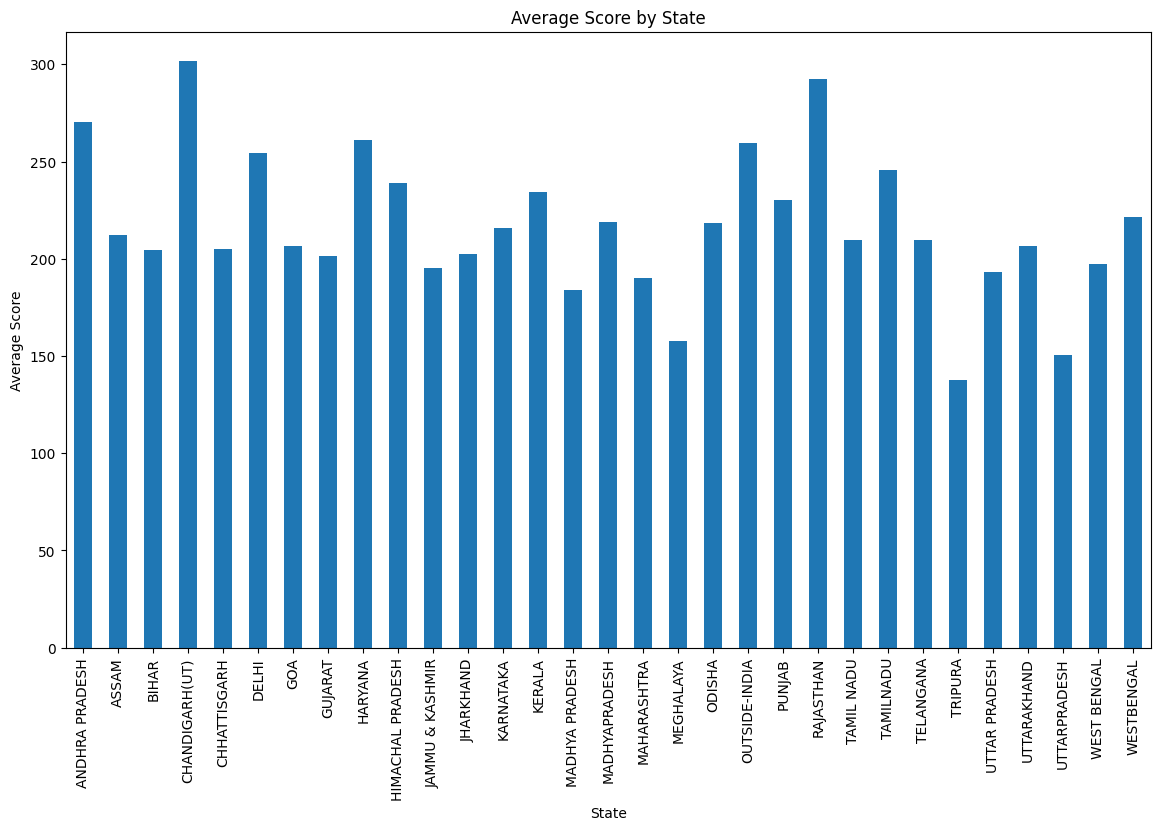

In [16]:
# State-wise performance analysis
state_performance = df.groupby('center_state')['score'].agg(['mean', 'count'])
plt.figure(figsize=(14, 8))
state_performance['mean'].plot(kind='bar')
plt.title('Average Score by State')
plt.xlabel('State')
plt.ylabel('Average Score')
plt.show()

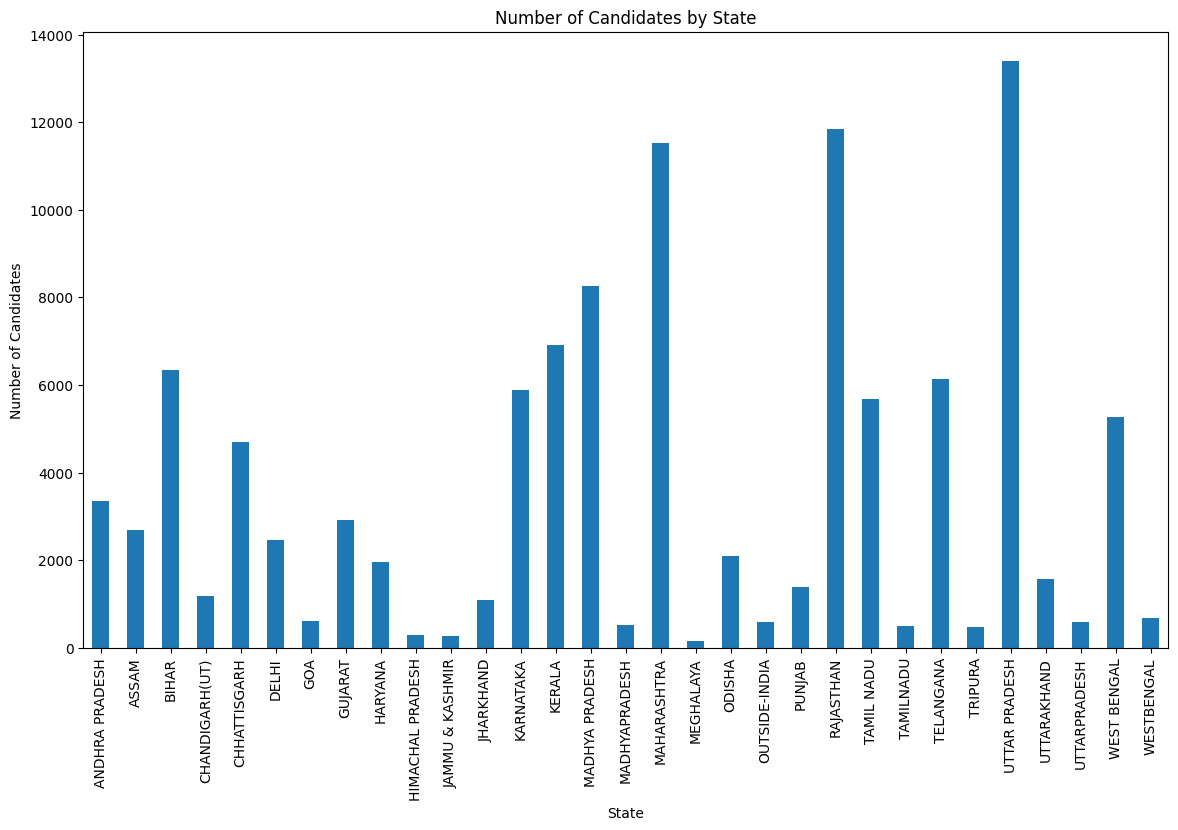

In [17]:
# Distribution of number of candidates by state
plt.figure(figsize=(14, 8))
state_performance['count'].plot(kind='bar')
plt.title('Number of Candidates by State')
plt.xlabel('State')
plt.ylabel('Number of Candidates')
plt.show()

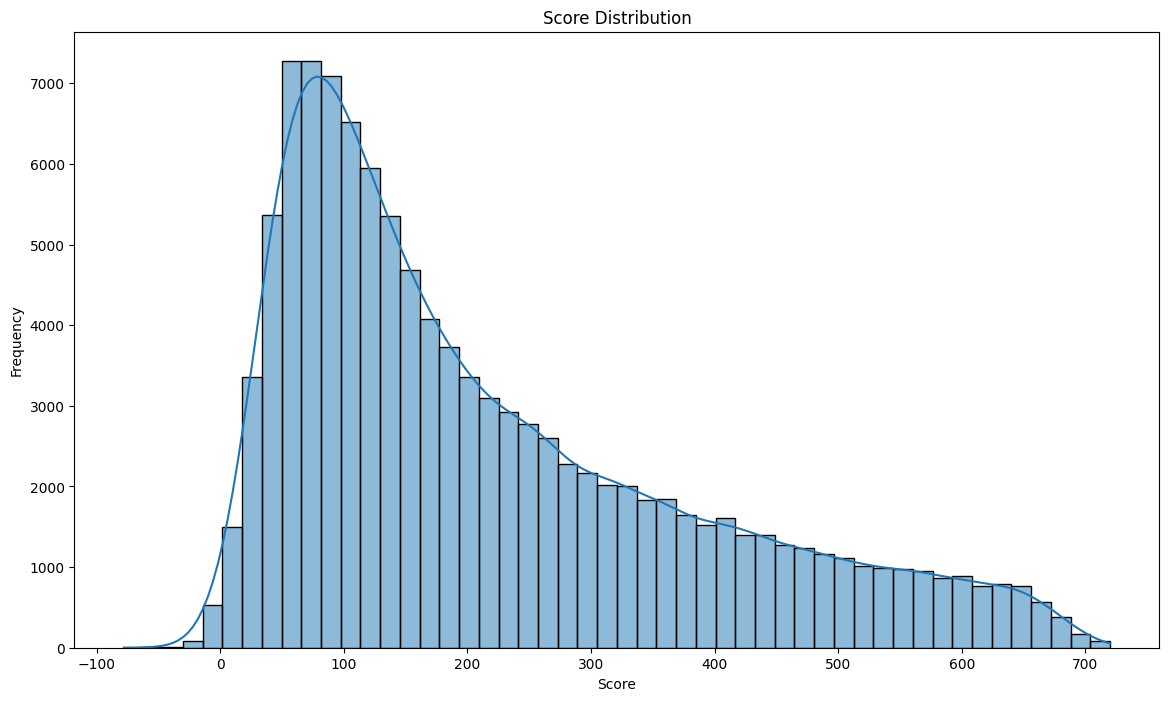

In [18]:
# Analyzing distribution of scores
plt.figure(figsize=(14, 8))
sns.histplot(df['score'], bins=50, kde=True)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Identifying score ranges
score_ranges = pd.cut(df['score'], bins=[0, 200, 400, 600, 800, 1000], right=False)
score_distribution = score_ranges.value_counts().sort_index()
print("Score Distribution in Ranges:")
print(score_distribution)

Score Distribution in Ranges:
score
[0, 200)       63613
[200, 400)     28705
[400, 600)     14467
[600, 800)      4014
[800, 1000)        0
Name: count, dtype: int64


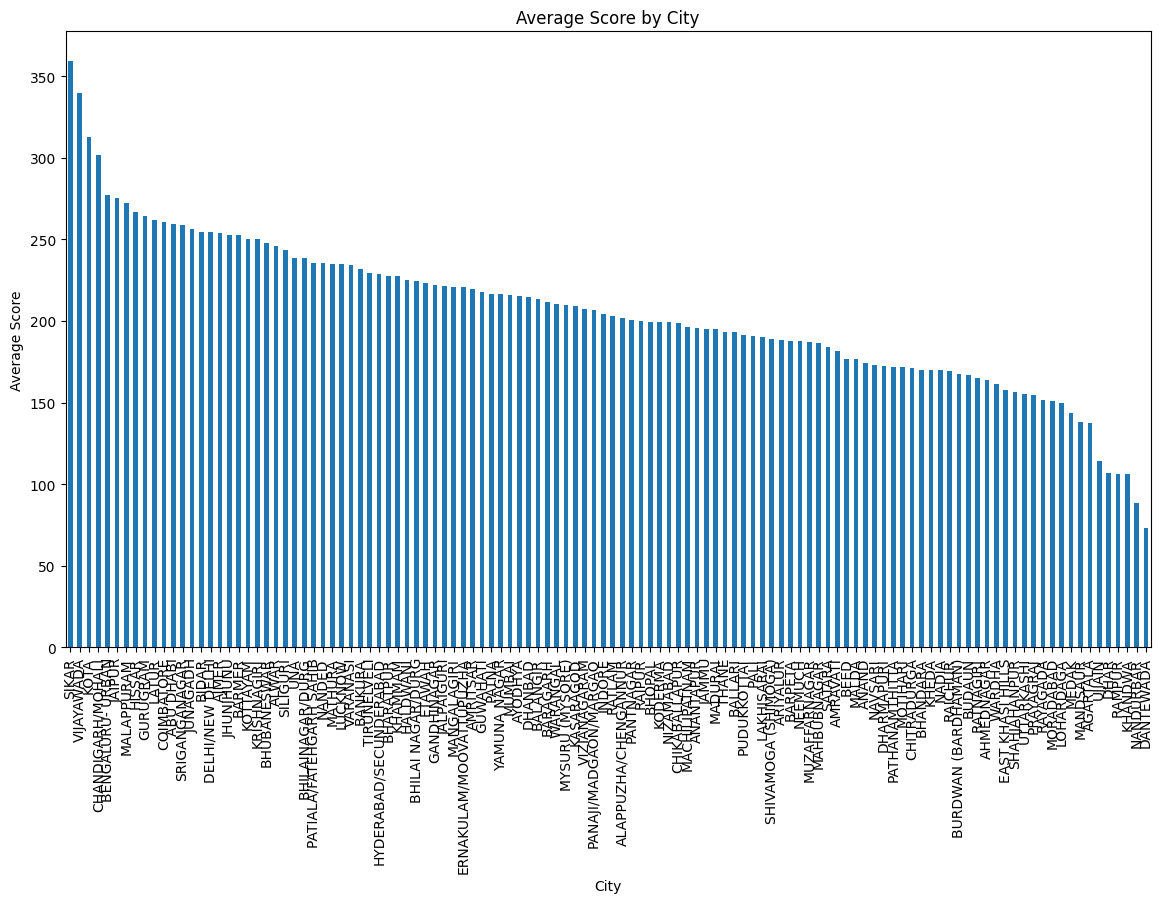

In [20]:
# Performance by center city
city_performance = df.groupby('center_city')['score'].agg(['mean', 'count'])
plt.figure(figsize=(14, 8))
city_performance['mean'].sort_values(ascending=False).plot(kind='bar')
plt.title('Average Score by City')
plt.xlabel('City')
plt.ylabel('Average Score')
plt.show()

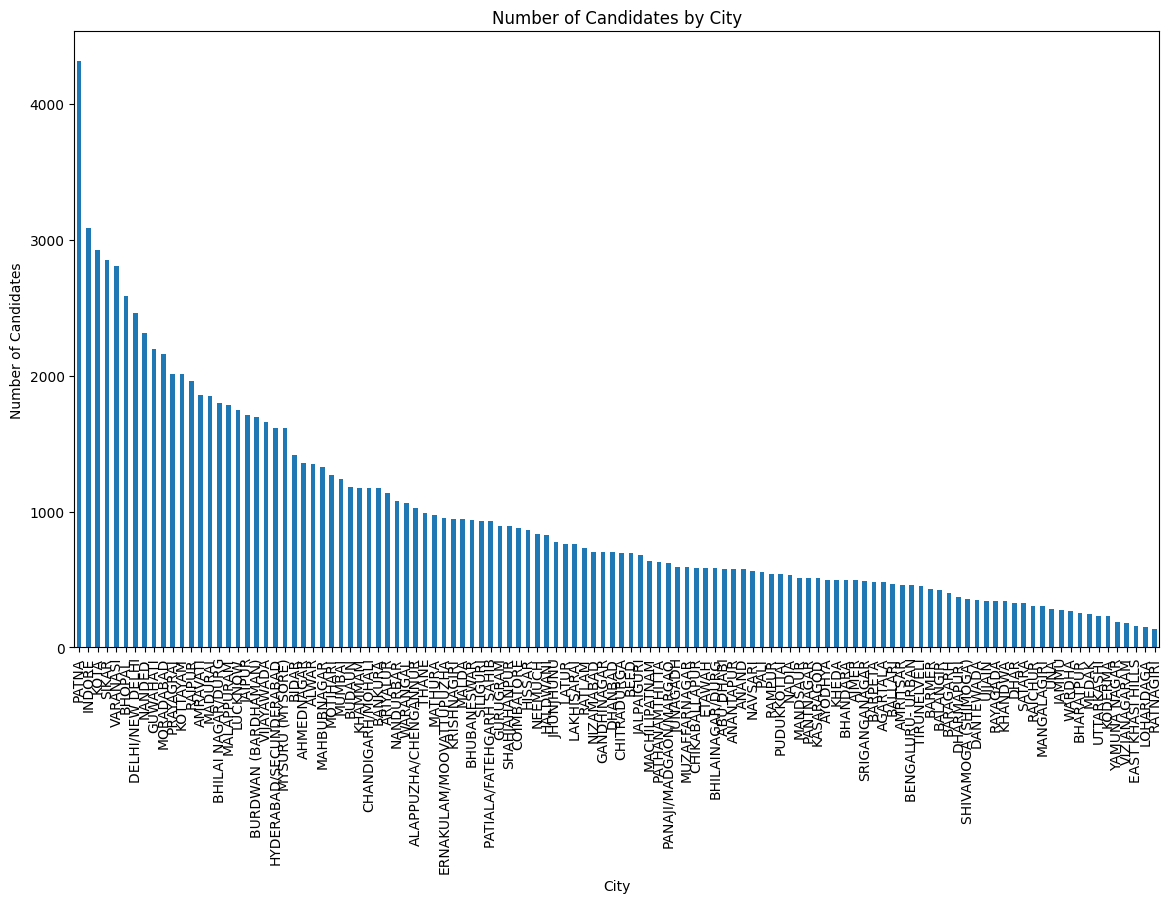

In [21]:
# Distribution of number of candidates by city
plt.figure(figsize=(14, 8))
city_performance['count'].sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Candidates by City')
plt.xlabel('City')
plt.ylabel('Number of Candidates')
plt.show()

In [22]:
# Summary statistics of the scores
summary_stats = df['score'].describe()
print("Summary Statistics of Scores:")
print(summary_stats)

Summary Statistics of Scores:
count    111291.000000
mean        218.090501
std         167.194184
min         -78.000000
25%          87.000000
50%         164.000000
75%         316.000000
max         720.000000
Name: score, dtype: float64


In [23]:
# Quartiles and IQR
q1 = df['score'].quantile(0.25)
q3 = df['score'].quantile(0.75)
iqr = q3 - q1
print(f"\nQ1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"Interquartile Range (IQR): {iqr}")


Q1 (25th percentile): 87.0
Q3 (75th percentile): 316.0
Interquartile Range (IQR): 229.0


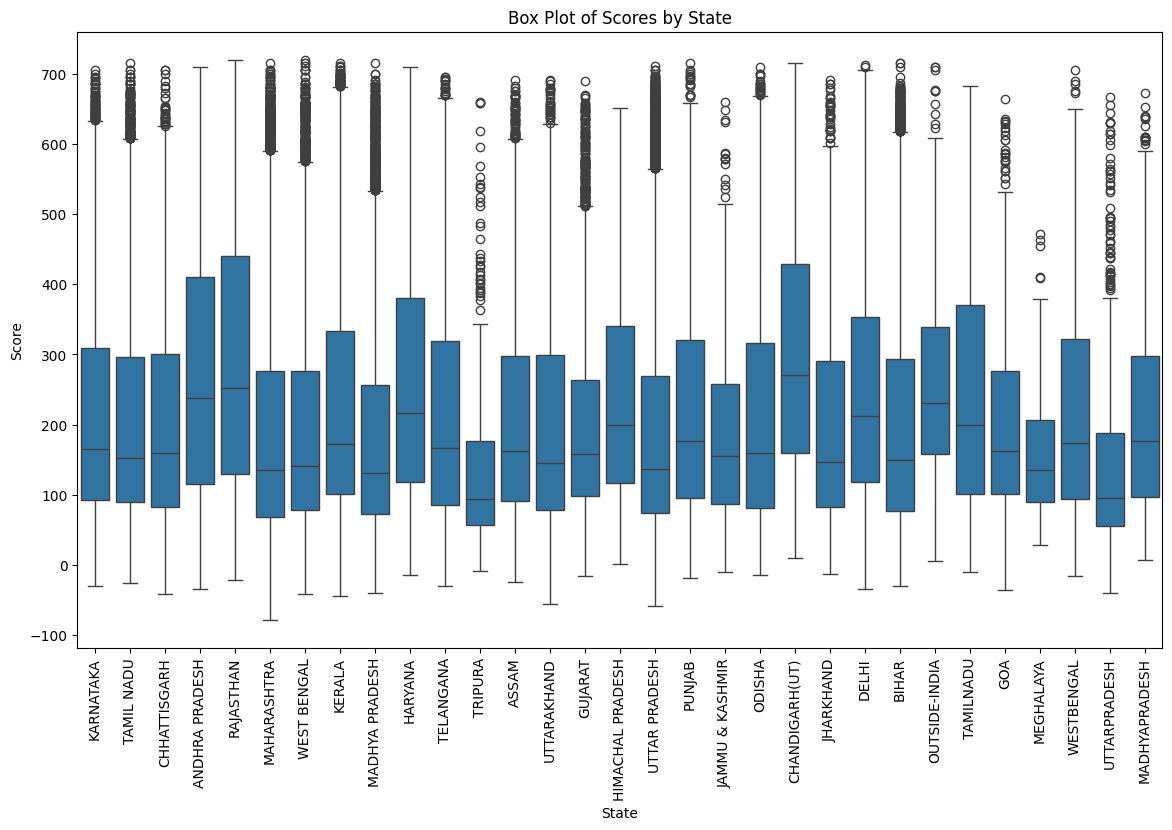

In [24]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='center_state', y='score', data=df)
plt.title('Box Plot of Scores by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Score')
plt.show()


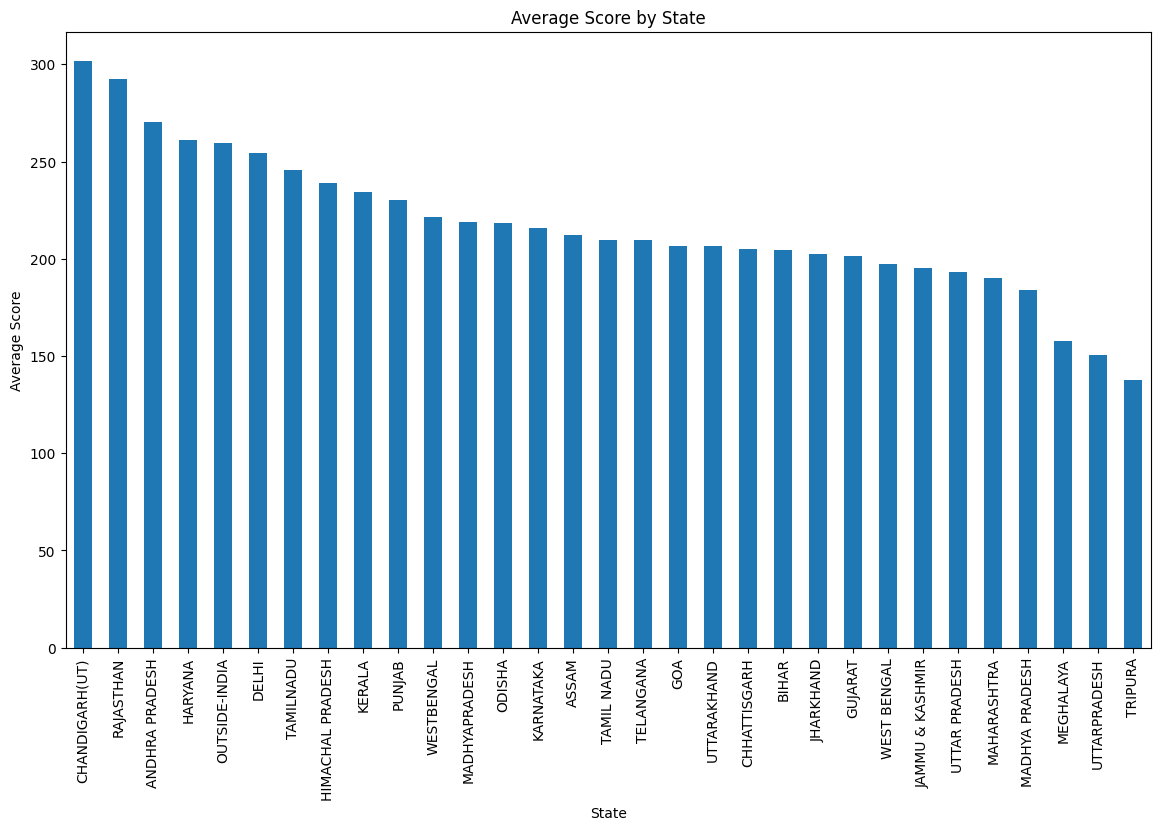

In [25]:
state_avg_score = df.groupby('center_state')['score'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
state_avg_score.plot(kind='bar')
plt.title('Average Score by State')
plt.xlabel('State')
plt.ylabel('Average Score')
plt.show()


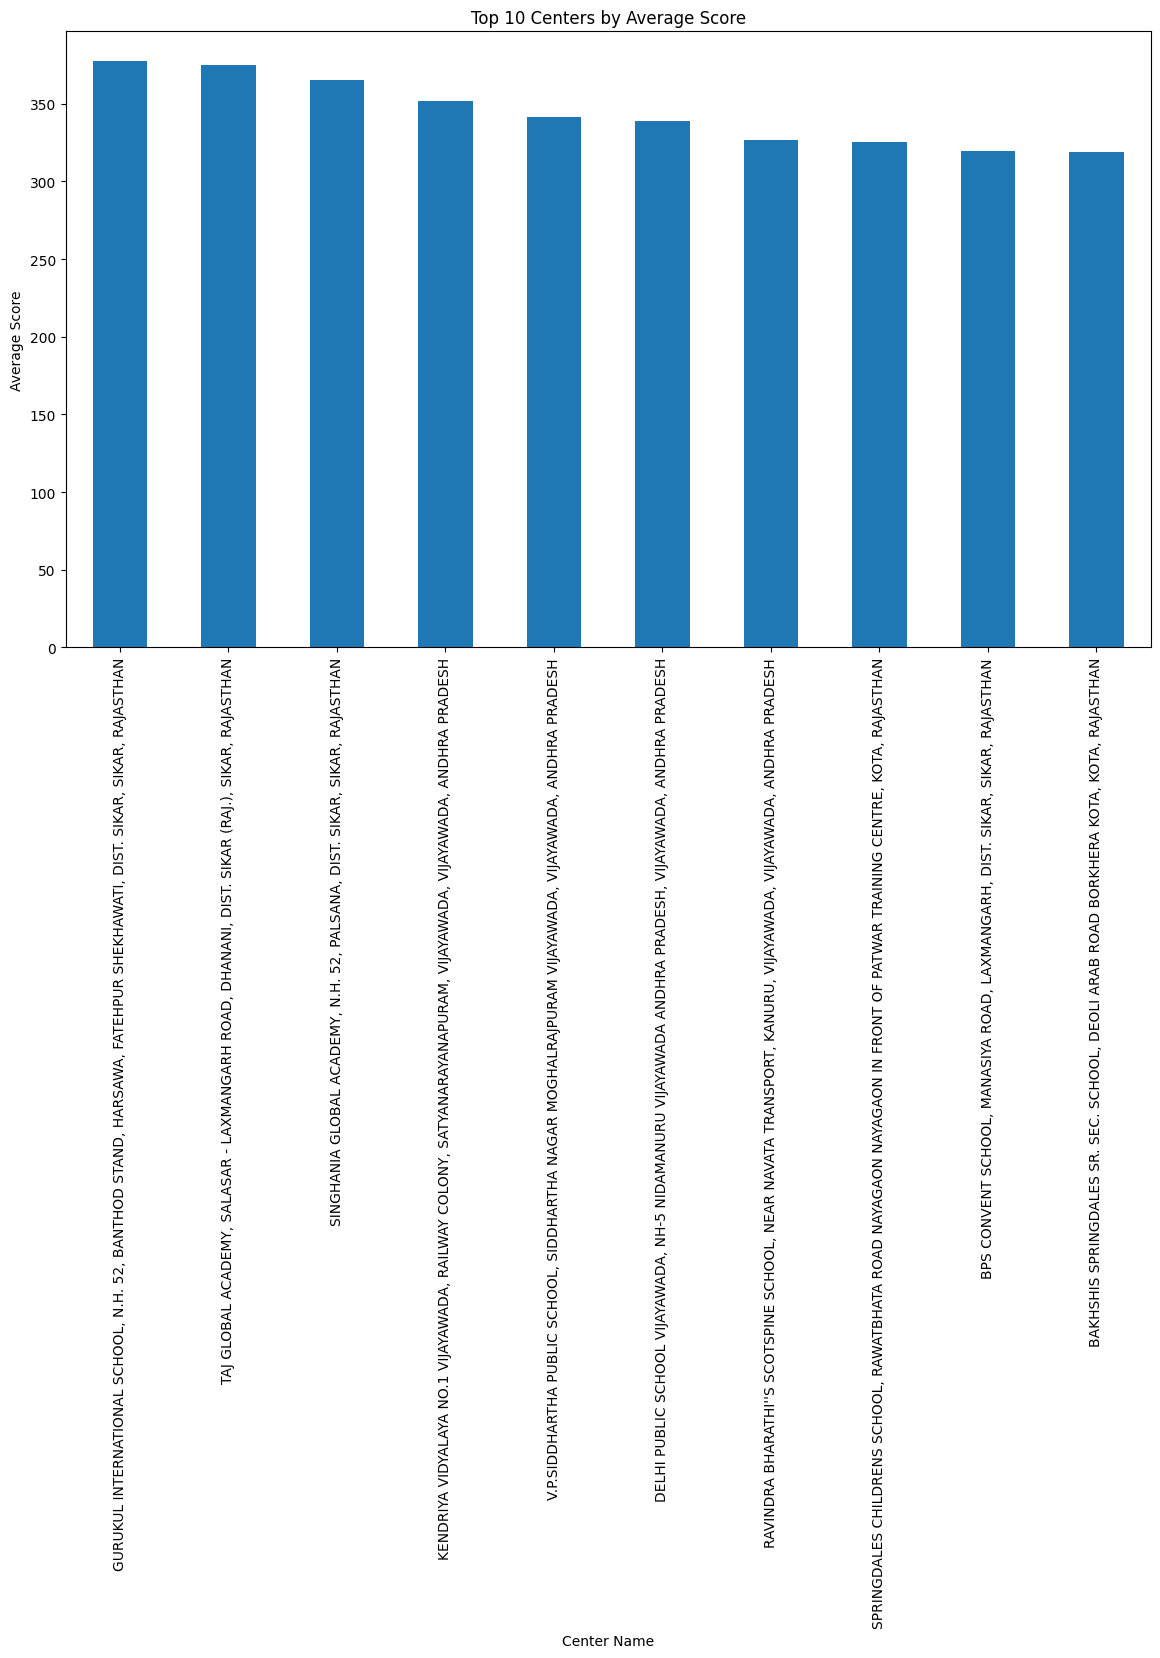

In [26]:
top_centers = df.groupby('center_name')['score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 8))
top_centers.plot(kind='bar')
plt.title('Top 10 Centers by Average Score')
plt.xlabel('Center Name')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()


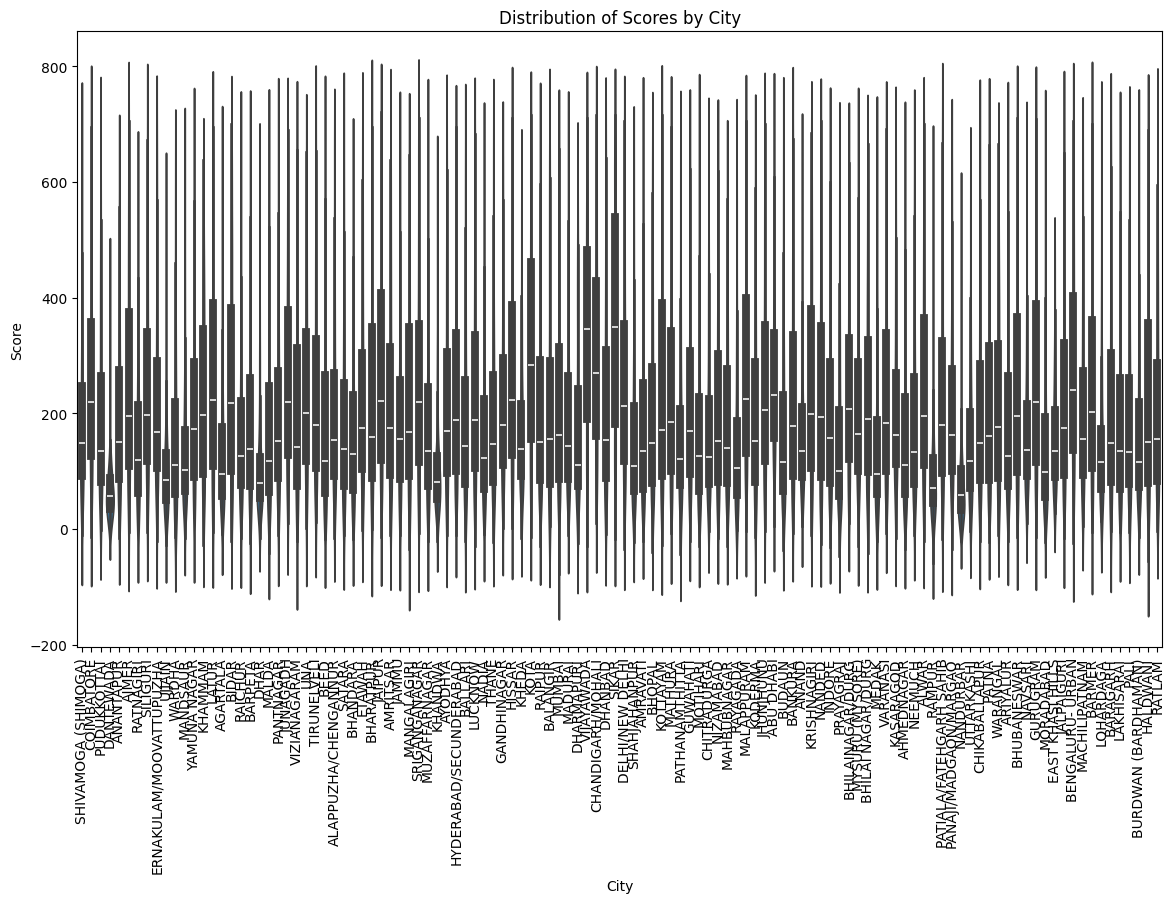

In [27]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='center_city', y='score', data=df)
plt.title('Distribution of Scores by City')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Score')
plt.show()


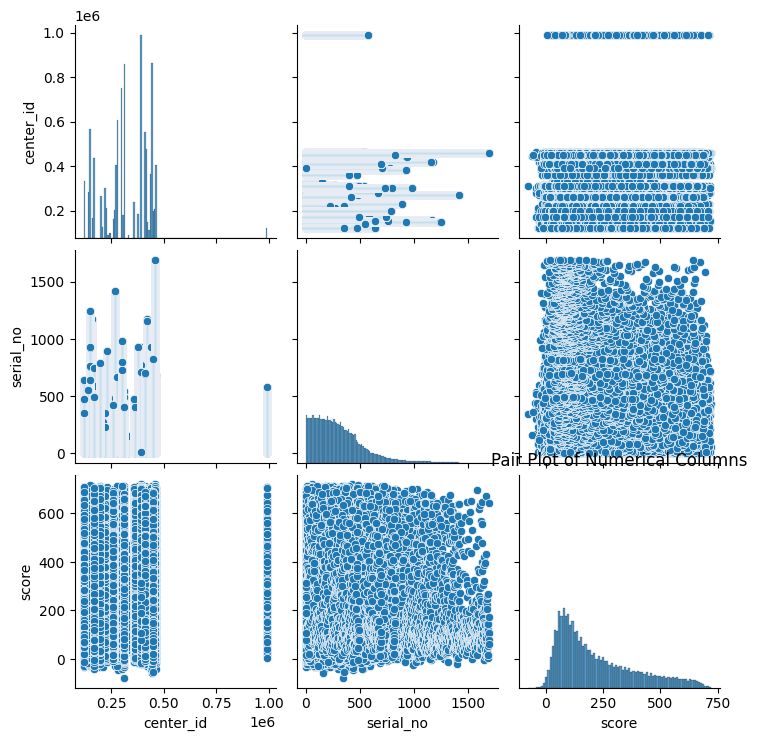

In [28]:
sns.pairplot(df)
plt.title('Pair Plot of Numerical Columns')
plt.show()


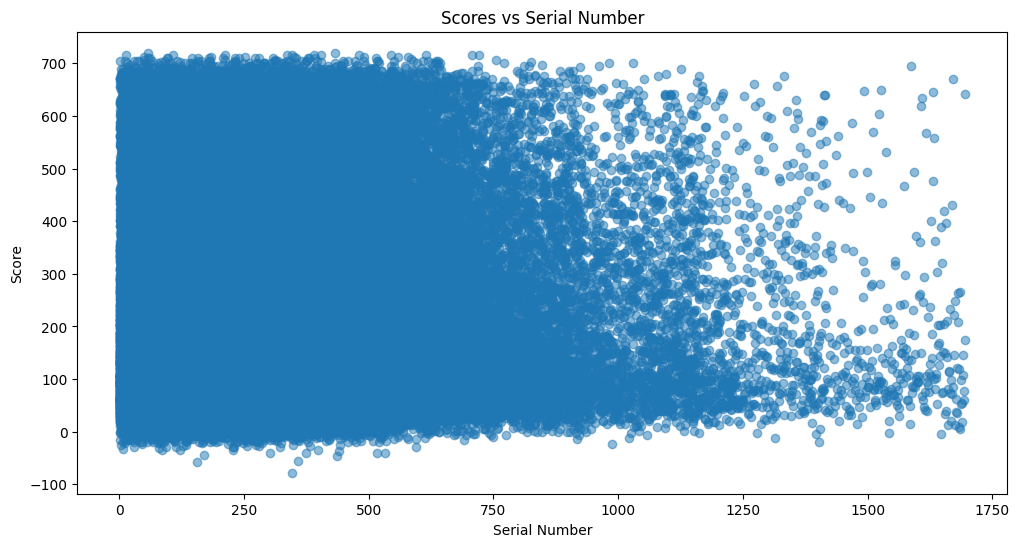

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(df['serial_no'], df['score'], alpha=0.5)
plt.title('Scores vs Serial Number')
plt.xlabel('Serial Number')
plt.ylabel('Score')
plt.show()


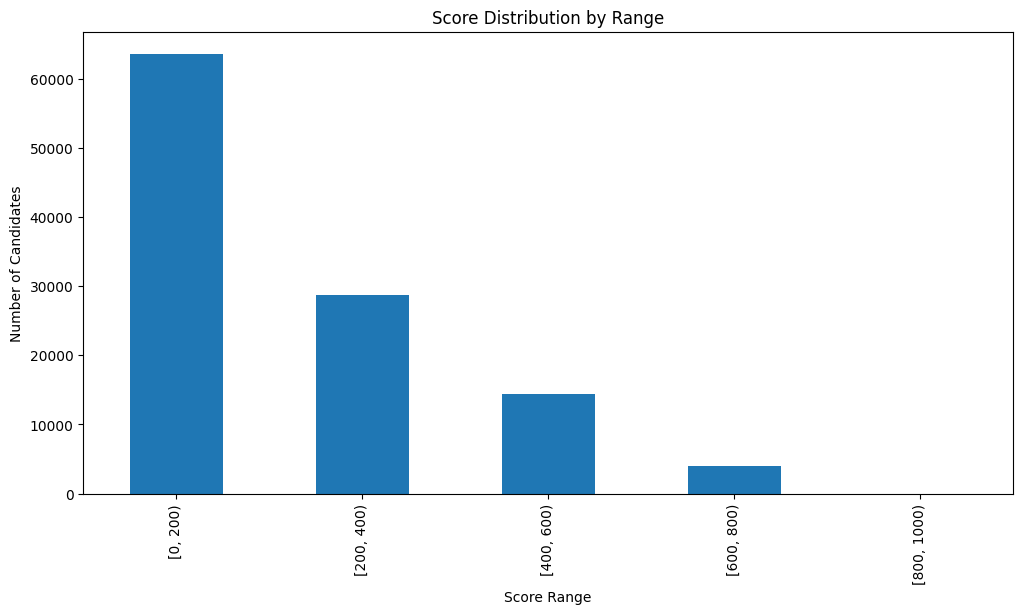

In [30]:
score_ranges = pd.cut(df['score'], bins=[0, 200, 400, 600, 800, 1000], right=False)
score_distribution = score_ranges.value_counts().sort_index()

plt.figure(figsize=(12, 6))
score_distribution.plot(kind='bar')
plt.title('Score Distribution by Range')
plt.xlabel('Score Range')
plt.ylabel('Number of Candidates')
plt.show()


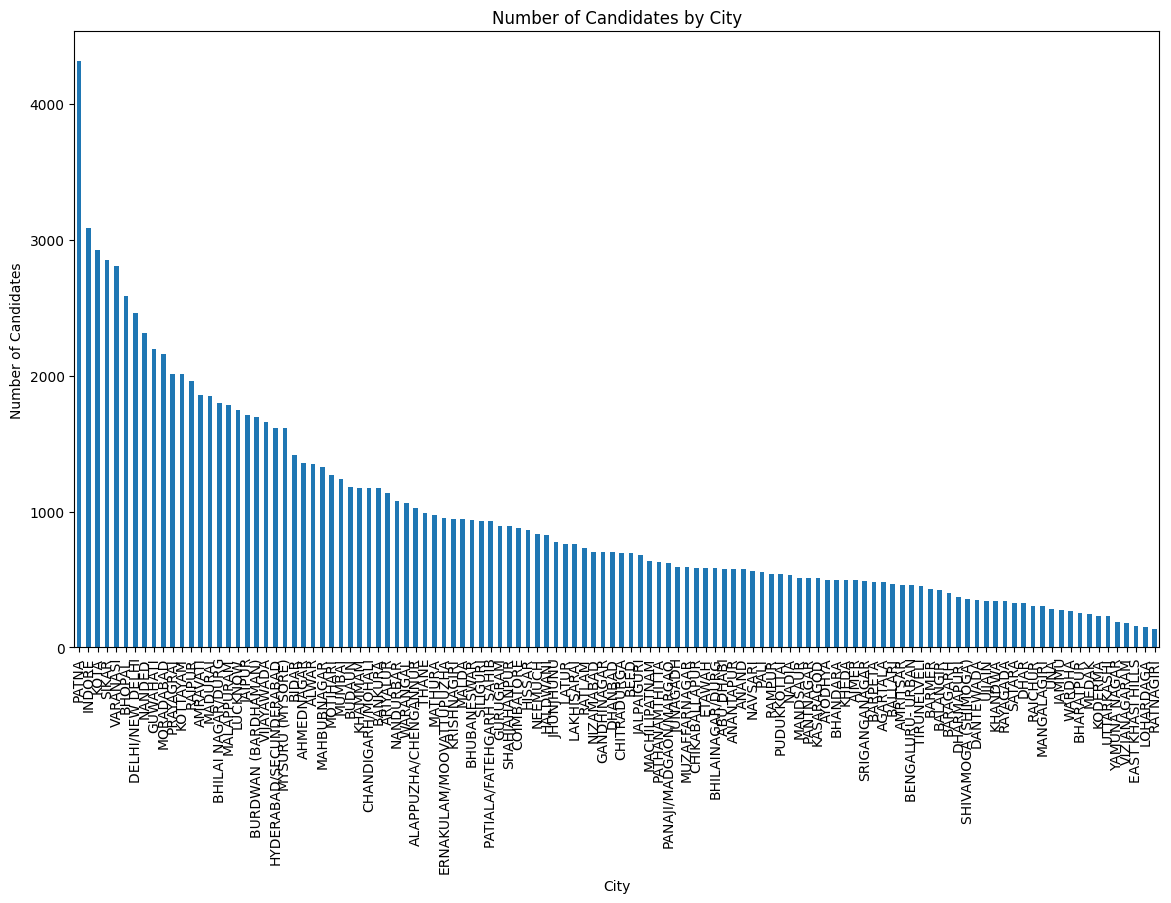

In [31]:
city_counts = df['center_city'].value_counts()
plt.figure(figsize=(14, 8))
city_counts.plot(kind='bar')
plt.title('Number of Candidates by City')
plt.xlabel('City')
plt.ylabel('Number of Candidates')
plt.show()


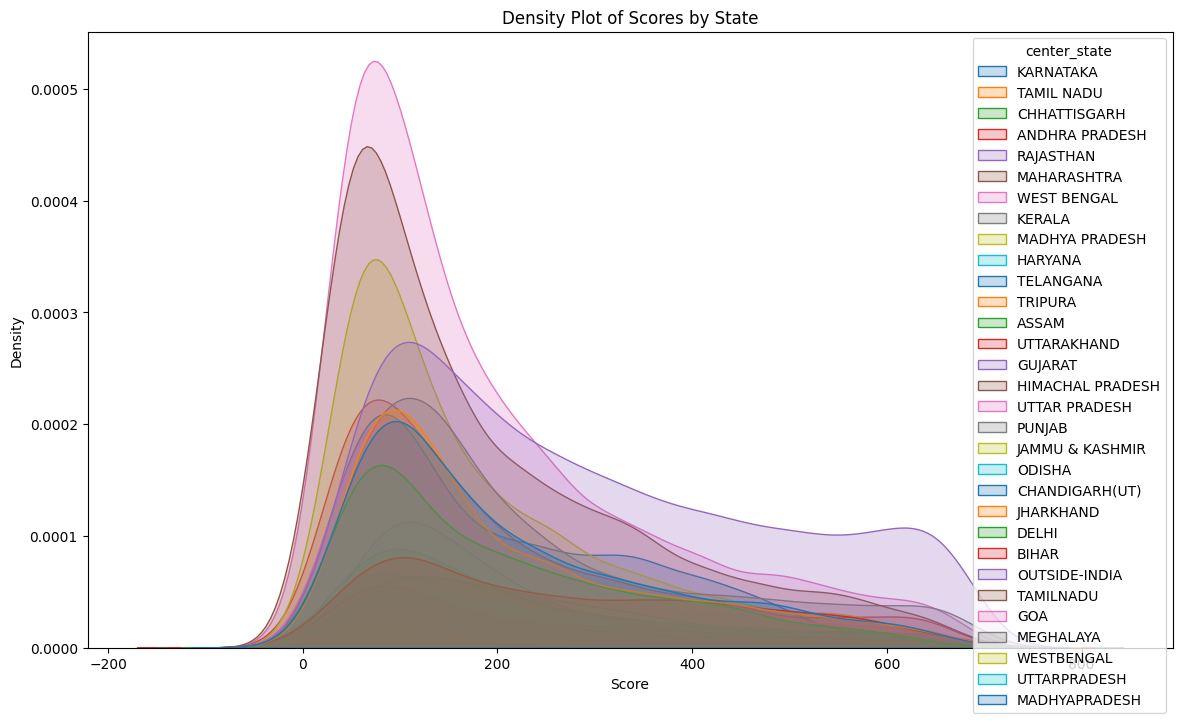

In [32]:
plt.figure(figsize=(14, 8))
sns.kdeplot(data=df, x='score', hue='center_state', fill=True, palette='tab10')
plt.title('Density Plot of Scores by State')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()


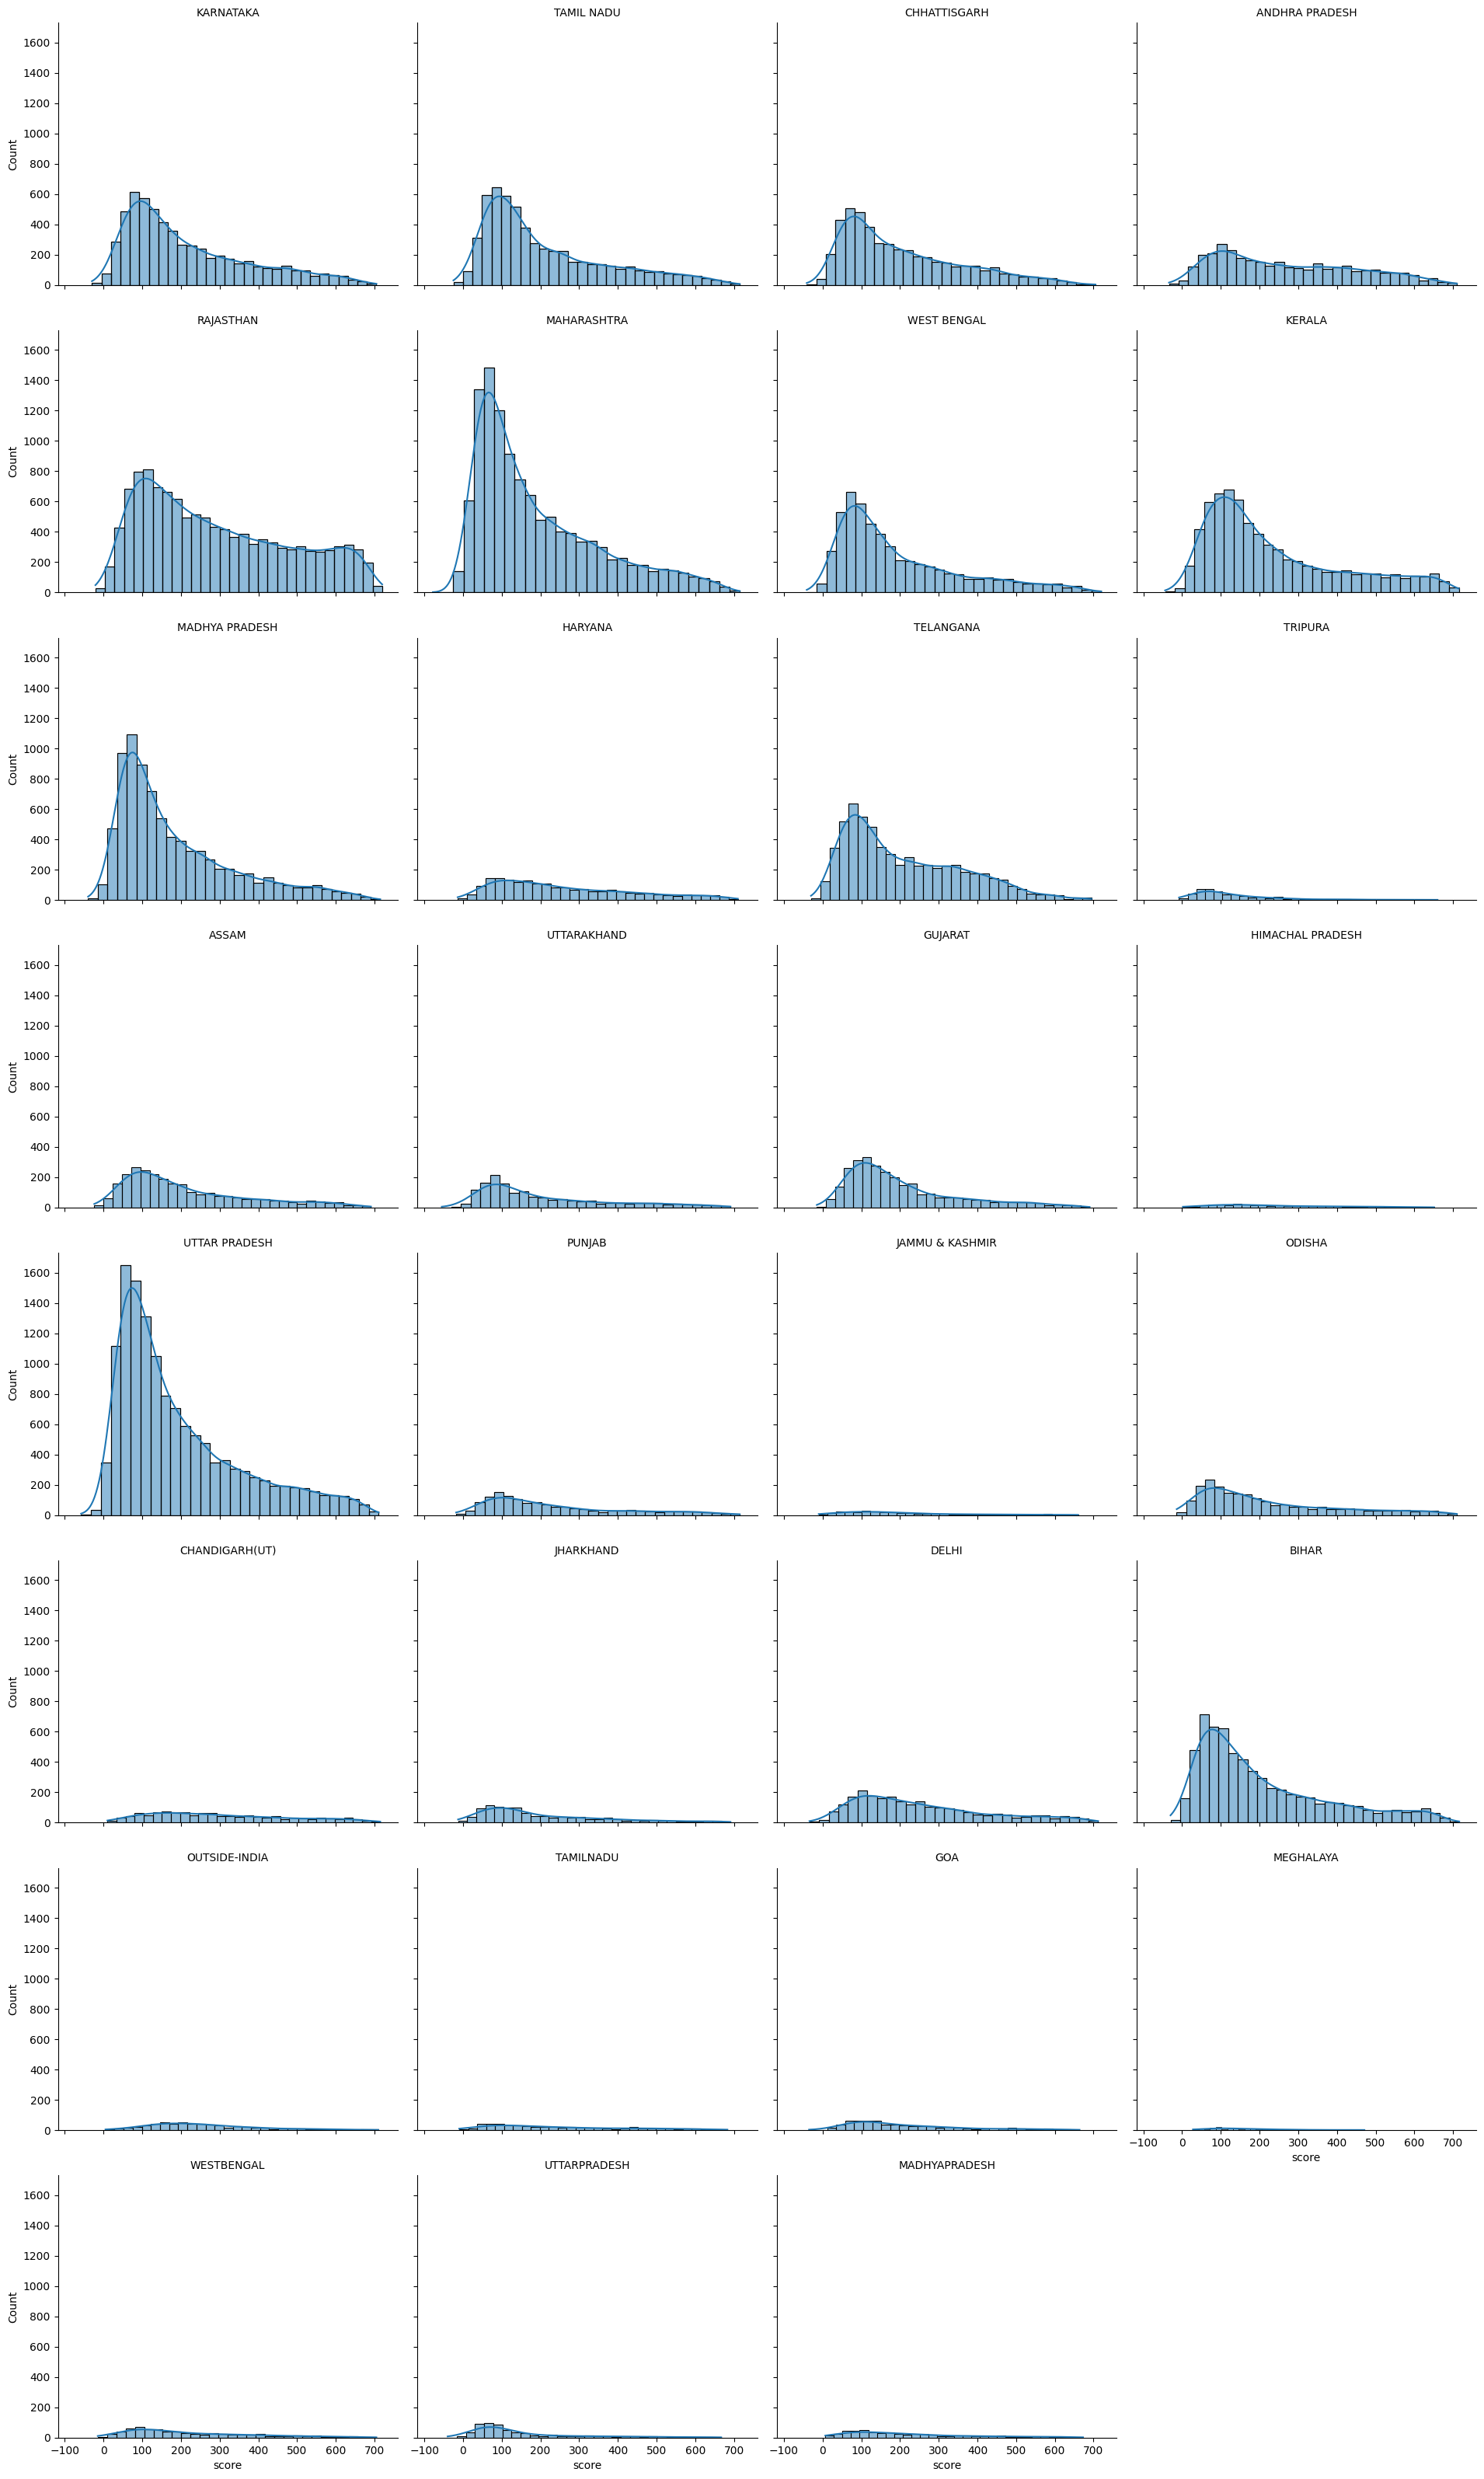

In [33]:
g = sns.FacetGrid(df, col='center_state', col_wrap=4, height=4, aspect=1.2, palette='husl')
g.map(sns.histplot, 'score', bins=30, kde=True)
g.set_titles(col_template="{col_name}")
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


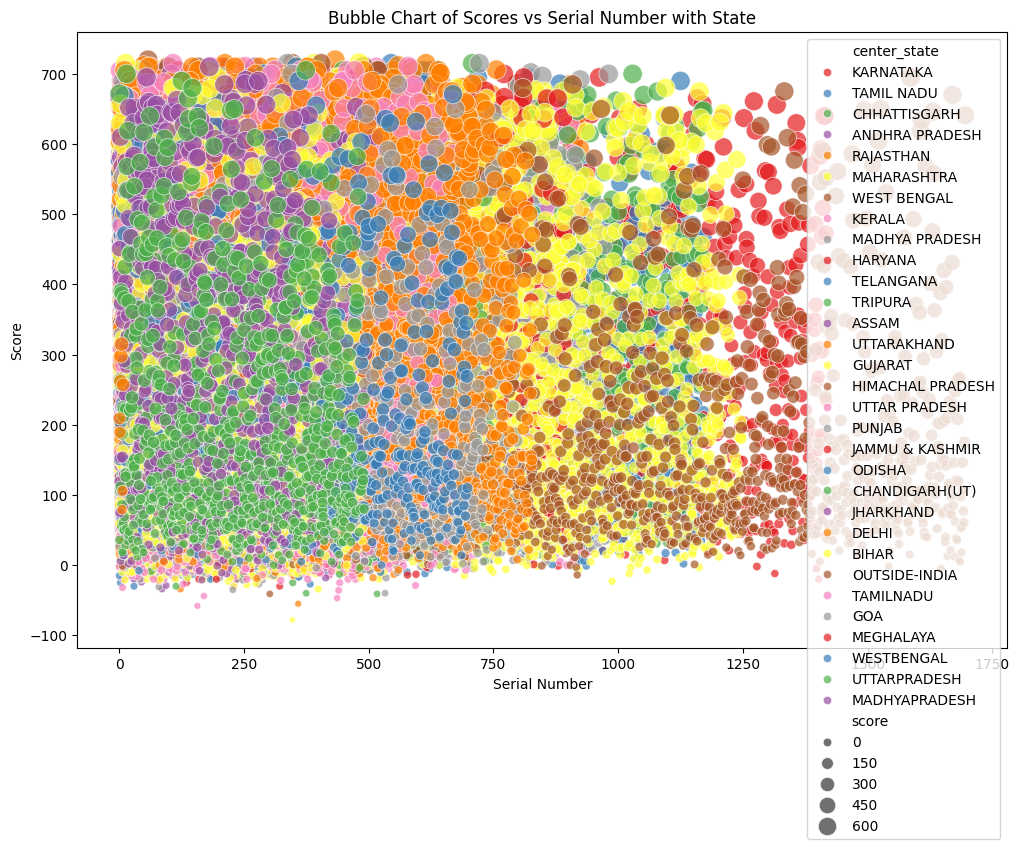

In [34]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='serial_no', y='score', data=df, hue='center_state', size='score', sizes=(20, 200), palette='Set1', alpha=0.7)
plt.title('Bubble Chart of Scores vs Serial Number with State')
plt.xlabel('Serial Number')
plt.ylabel('Score')
plt.show()


In [35]:
import plotly.express as px

# Prepare data for sunburst chart
sunburst_df = df.groupby(['center_state', 'center_city'])['score'].mean().reset_index()

fig = px.sunburst(sunburst_df, path=['center_state', 'center_city'], values='score', color='score', color_continuous_scale='Viridis')
fig.update_layout(title='Sunburst Chart of Average Scores by State and City')
fig.show()


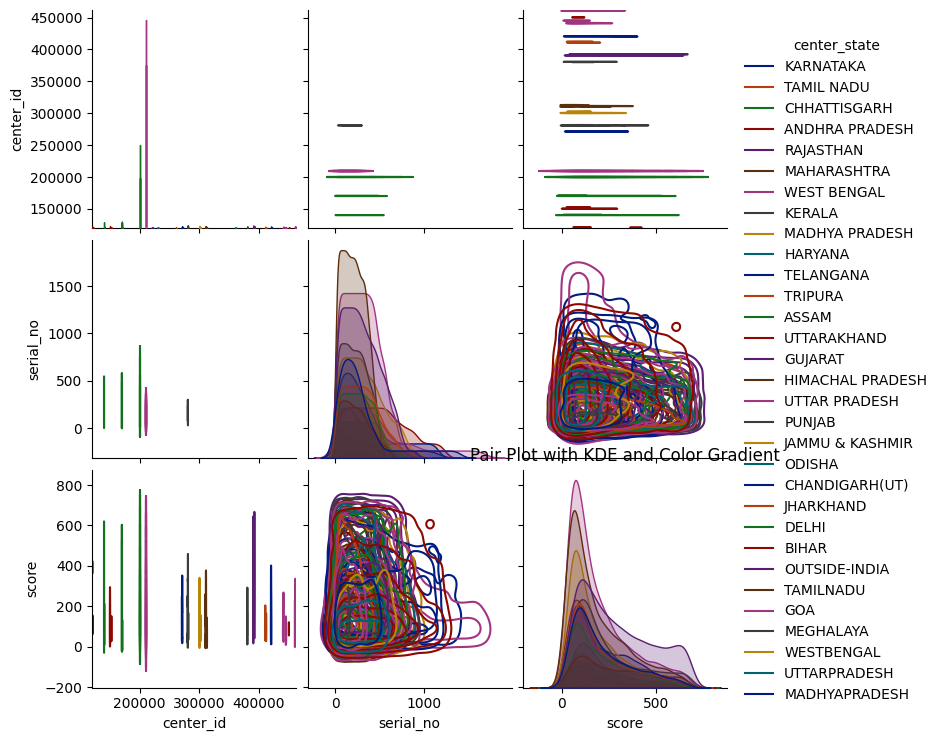

In [36]:
sns.pairplot(df, hue='center_state', palette='dark', kind='kde')
plt.title('Pair Plot with KDE and Color Gradient')
plt.show()


<Figure size 1600x1000 with 0 Axes>

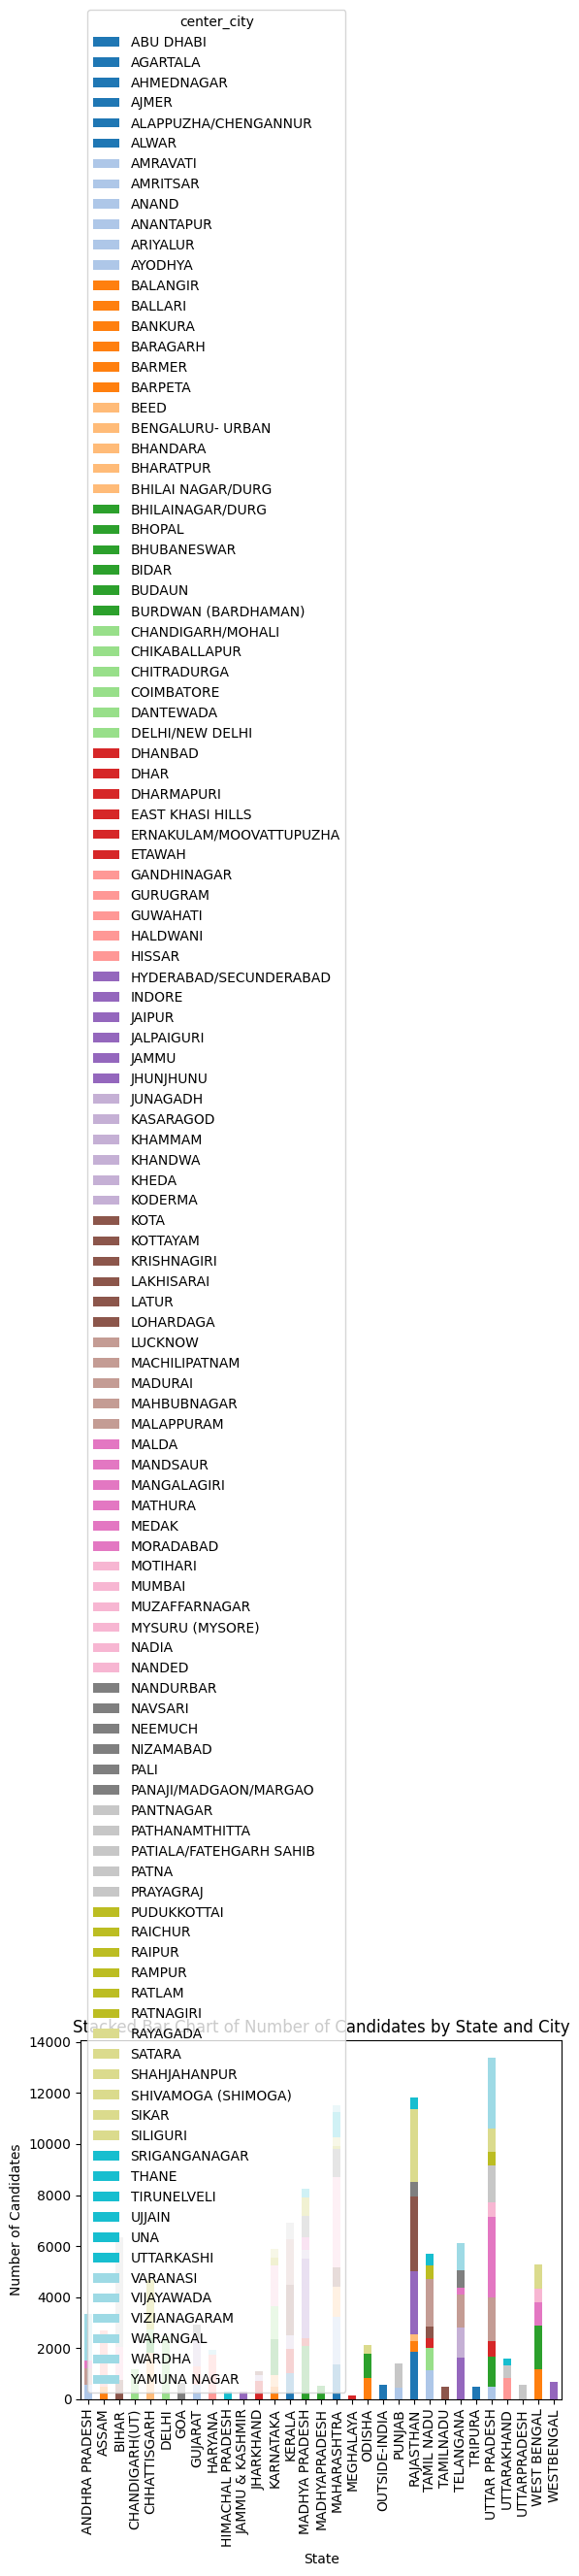

In [38]:
state_city_counts = df.groupby(['center_state', 'center_city']).size().unstack()

plt.figure(figsize=(16, 10))
state_city_counts.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Stacked Bar Chart of Number of Candidates by State and City')
plt.xlabel('State')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=90)
plt.show()
